In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\DeveshNarain\deep_learning_codebasics\datasets\homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
X = df.drop(["price"],axis=1)
y = df["price"]

In [14]:
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
sy = MinMaxScaler()

scaled_X = sx.fit_transform(X)
scaled_y = sy.fit_transform(y.values.reshape(df.shape[0],1))

scaled_X,scaled_y

(array([[0.08827586, 0.25      ],
        [0.62068966, 0.75      ],
        [0.22068966, 0.5       ],
        [0.24862069, 0.5       ],
        [0.13793103, 0.25      ],
        [0.12758621, 0.25      ],
        [0.6662069 , 0.75      ],
        [0.86206897, 0.75      ],
        [0.17586207, 0.5       ],
        [1.        , 1.        ],
        [0.34482759, 0.5       ],
        [0.68448276, 0.75      ],
        [0.06896552, 0.25      ],
        [0.10344828, 0.25      ],
        [0.5       , 0.5       ],
        [0.12931034, 0.25      ],
        [0.13103448, 0.5       ],
        [0.25517241, 0.5       ],
        [0.67931034, 0.5       ],
        [0.        , 0.        ]]),
 array([[0.05237037],
        [0.65185185],
        [0.22222222],
        [0.31851852],
        [0.14074074],
        [0.04444444],
        [0.76296296],
        [0.91111111],
        [0.13333333],
        [1.        ],
        [0.37037037],
        [0.8       ],
        [0.04444444],
        [0.05925926],
        [0

In [32]:
scaled_y.reshape(y.shape[0],)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [38]:
def batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    num_features = X.shape[1]
    m = X.shape[0]
    w = np.ones(num_features)
    b = 0

    cost_list = []
    epoch_list = []
    for i in range(epochs):
        y_pred = np.dot(w,X.T) + b
        w_grad = -(2/m)*(np.dot(X.T,(y_true - y_pred)))
        b_grad = -(2/m)*np.sum(y_true - y_pred)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        cost = (1/m)*np.sum((y_true - y_pred)**2)
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            
    return w,b,cost,cost_list,epoch_list

w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

In [61]:
def predict(X,w,b):
    scaled_price = np.dot(w,X.reshape(-1,1)) + b
    return sy.inverse_transform(scaled_price.reshape(-1,1))

predict(scaled_X[1],w,b)

array([[128.45484403]])

In [97]:
predict(scaled_X[0],w,b)

array([[32.09649526]])

In [62]:
X.loc[1]

area        2600
bedrooms       4
Name: 1, dtype: int64

In [63]:
y[1]

120.0

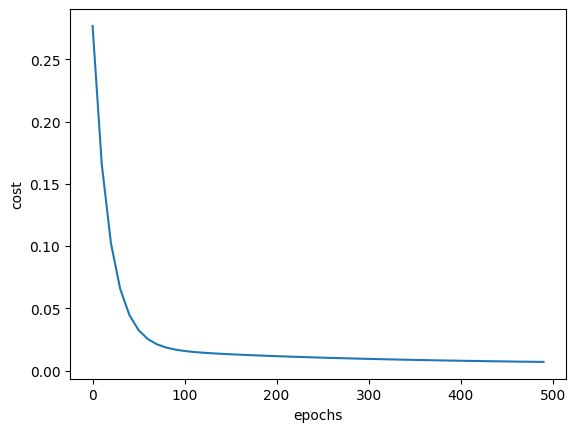

In [100]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [64]:
import random

In [93]:
def stochastic_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    num_features = X.shape[1]
    m = X.shape[0]
    w = np.ones(num_features)
    b = 0
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        sample = random.randint(0,m-1)
        sample_X = X[sample]
        sample_y = y_true[sample]
        
        y_pred = np.dot(w,sample_X.T) + b
        w_grad = -(2/m)*np.dot(sample_X.T,(sample_y - y_pred))
        b_grad = -(2/m)*np.sum((sample_y - y_pred))
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        cost = np.square(sample_y - y_pred)
        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(scaled_X,scaled_y.reshape(y.shape[0],),10000)
w_sgd,b_sgd,cost_sgd

(array([0.70250256, 0.67347198]), -0.22745614428029803, 0.00019370990514165436)

In [95]:
w,b,cost

(array([0.70712464, 0.67456527]), -0.23034857438407422, 0.0068641890429808105)

In [96]:
predict(scaled_X[0],w_sgd,b_sgd)

array([[32.61568714]])

In [98]:
y[0]

39.07

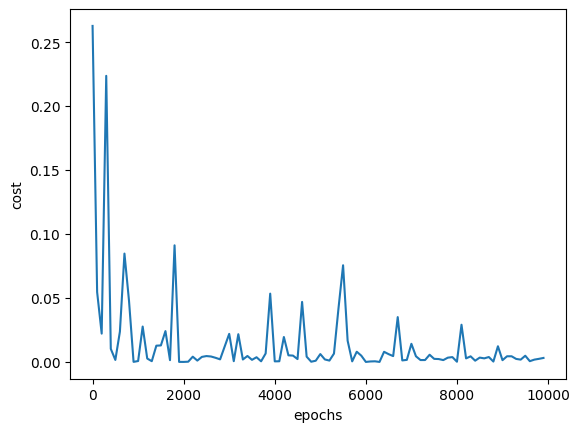

In [99]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)
# sgd requires more epochs for getting optimal values of w and b

In [ ]:
Exercise
Implement mini batch gradient descent in python and plot cost vs epoch graph. Mini batch is intermediate version of batch GD and stochastic GD.
In stochastic we used one randomly picked training sample, In mini gradient descent you will use a batch of samples in each iterations. 
For example if you have total 50 training samples, you can take a batch of 10 samples, calculate cumulitive error for those 10 samples and
then adjust weights. In SGD we adjust weights after every one sample. In Batch we adjust weights after going through all samples but in mini batch 
we do after every m samples (where m is batch size and it is 0 < m < n, where n is total number of samples.

In [120]:
random.sample(range(0,100),10)

[47, 29, 75, 78, 9, 68, 52, 65, 10, 42]

In [135]:
def mini_batch_gradient_descent(X,y_true,epochs,learning_rate=0.01):
    num_features = X.shape[1]
    m = X.shape[0]
    w = np.ones(num_features)
    b = 0
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        sample = random.sample(range(0,m-1),10)
        sample_X = X[sample]
        sample_y = y_true[sample]
        
        y_pred = np.dot(w,sample_X.T) + b
        w_grad = -(2/m)*np.dot(sample_X.T,(sample_y - y_pred))
        b_grad = -(2/m)*np.sum((sample_y - y_pred))
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        cost = np.square(sample_y - y_pred)
        if i%100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

w_mb, b_mb, cost_mb, cost_list_mb, epoch_list_mb = stochastic_gradient_descent(scaled_X,scaled_y.reshape(y.shape[0],),12000)
w_mb,b_mb,cost_mb

(array([0.68661546, 0.65315077]), -0.21146632687914846, 0.006891680842497599)

In [136]:
predict(scaled_X[0],w_mb,b_mb)

array([[33.67844638]])

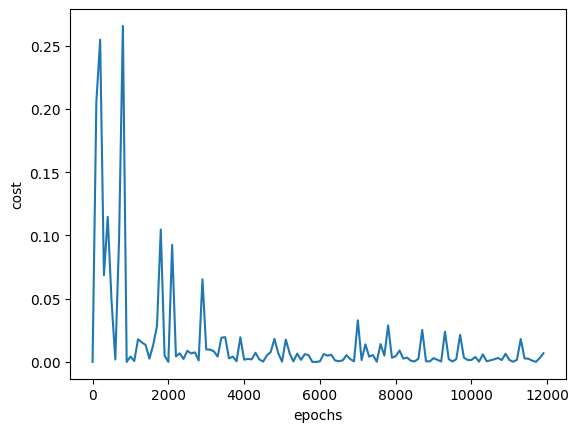

In [137]:
plt.xlabel("epochs")
plt.ylabel("cost")
plt.plot(epoch_list_mb,cost_list_mb)